1. CARREGANDO E PREPARANDO OS DADOS

Proporção original da classe positiva: 5.63%

2. BALANCEANDO OS DADOS

Novo tamanho da base balanceada: (2308, 32)
Distribuição balanceada:
Doença_cardíaca
1    1154
0    1154
Name: count, dtype: int64

Proporção no treino: 50.00%
Proporção no teste: 50.00%

4. CONFIGURANDO LIGHTAUTOML

Iniciando treinamento com dados balanceados...
[12:50:04] Stdout logging level is INFO.
[12:50:04] Task: binary

[12:50:04] Start automl preset with listed constraints:
[12:50:04] - time: 300.00 seconds
[12:50:04] - CPU: 4 cores
[12:50:04] - memory: 16 GB

[12:50:04] Train data shape: (1846, 32)

[12:50:23] Layer 1 train process start. Time left 281.19 secs
[12:50:24] Selector_LightGBM fitting and predicting completed
[12:50:24] Start fitting Lvl_0_Pipe_0_Mod_0_LightGBM ...
[12:50:30] Fitting Lvl_0_Pipe_0_Mod_0_LightGBM finished. score = 0.6977312663379226
[12:50:30] Lvl_0_Pipe_0_Mod_0_LightGBM fitting and predicting completed
[12:50:30] Start hyperparameters optimiz

Optimization Progress:  21%|██        | 21/101 [00:27<01:42,  1.29s/it, best_trial=2, best_value=0.705]

[12:50:57] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM completed
[12:50:57] Start fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM ...


[12:51:00] Fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM finished. score = 0.7005947678738487
[12:51:00] Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM fitting and predicting completed
[12:51:00] Start fitting Lvl_0_Pipe_0_Mod_2_CatBoost ...
[12:51:07] Fitting Lvl_0_Pipe_0_Mod_2_CatBoost finished. score = 0.700827181607857
[12:51:07] Lvl_0_Pipe_0_Mod_2_CatBoost fitting and predicting completed
[12:51:07] Start hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ... Time budget is 147.66 secs


Optimization Progress: 100%|██████████| 101/101 [02:25<00:00,  1.44s/it, best_trial=97, best_value=0.711]

[12:53:33] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost completed
[12:53:33] Start fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ...


[12:53:38] Fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost finished. score = 0.6948642433817842
[12:53:38] Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost fitting and predicting completed
[12:53:38] Time left 86.58 secs

[12:53:38] Layer 1 training completed.

[12:53:38] Blending: optimization starts with equal weights. Score = 0.7084945
[12:53:38] Blending: iteration 0: score = 0.7093525, weights = [0.         0.39533228 0.30233386 0.30233386]
[12:53:38] Blending: iteration 1: score = 0.7094042, weights = [0.         0.40572208 0.38196602 0.2123119 ]
[12:53:38] Blending: iteration 2: score = 0.7094359, weights = [0.08677779 0.35558084 0.34800854 0.20963283]
[12:53:38] Blending: no improvements for score. Terminated.

[12:53:38] Blending: best score = 0.7094359, best weights = [0.08677779 0.35558084 0.34800854 0.20963283]
[12:53:38] Automl preset training completed in 214.03 seconds

[12:53:38] Model description:
Final prediction for new objects (level 0) = 
	 0.08678 * (5 averaged models Lvl_0_Pipe_0_Mod

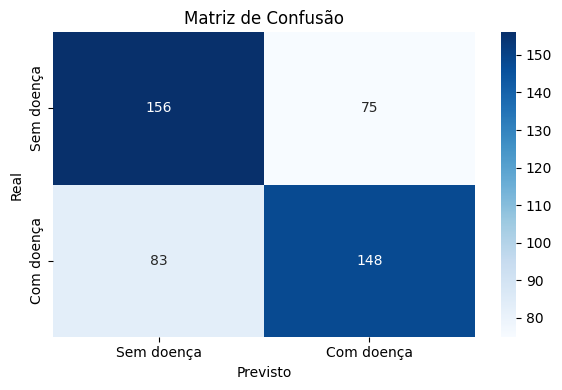


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.65      0.68      0.66       231
           1       0.66      0.64      0.65       231

    accuracy                           0.66       462
   macro avg       0.66      0.66      0.66       462
weighted avg       0.66      0.66      0.66       462


7. IMPORTÂNCIA DAS VARIÁVEIS
                           feature   importance
0                    Doença_mental  1708.372912
1                         Diabetes  1283.363320
2    Frequência_distúrbios_do_sono  1214.350912
3              Jornada_de_Trabalho  1174.632351
4             Tempo_parou_de_fumar  1083.115433
5    Frequência_falta_de_interesse   944.977630
6  Frequência_consumo_de_televisão   659.959700
7  Frequência_sintomas_depressivos   630.428021
8                   Consumo_de_sal   623.483008
9                     Escolaridade   563.257059


C:\Users\llays\AppData\Local\Temp\ipykernel_10988\1645451385.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')


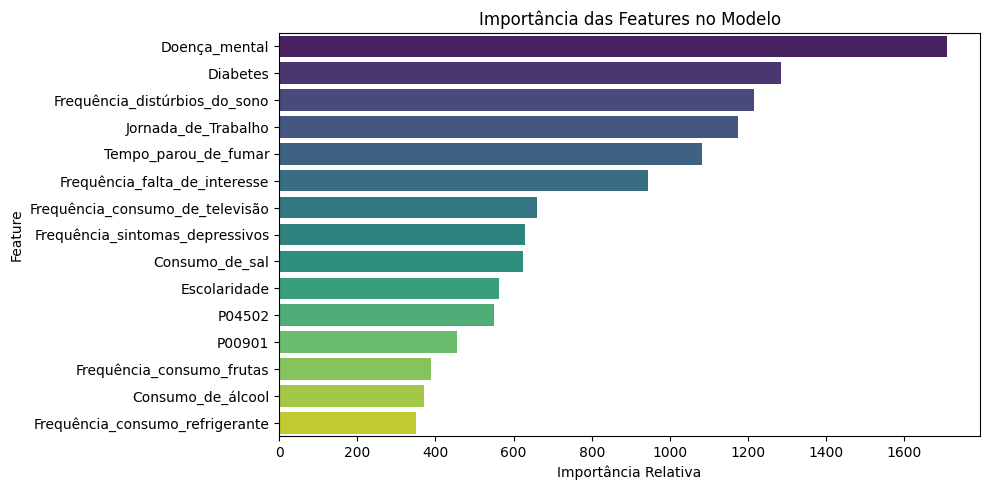

In [4]:
import pandas as pd
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# ==============================================
# 1. CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS
# ==============================================

print("="*50)
print("1. CARREGANDO E PREPARANDO OS DADOS")
print("="*50)

data = pd.read_csv('../Bases/Criados/6.1_base_final.csv')

# Mapeia a variável-alvo
data['Doença_cardíaca'] = data['Doença_cardíaca'].map({1: 1, 2: 0})
data = data.dropna(subset=['Doença_cardíaca'])

# Exibe proporção original
print(f"\nProporção original da classe positiva: {data['Doença_cardíaca'].mean():.2%}")

# ==============================================
# 2. BALANCEAMENTO (undersampling simples)
# ==============================================

print("\n" + "="*50)
print("2. BALANCEANDO OS DADOS")
print("="*50)

classe_0 = data[data['Doença_cardíaca'] == 0]
classe_1 = data[data['Doença_cardíaca'] == 1]

min_tam = min(len(classe_0), len(classe_1))

classe_0_res = resample(classe_0, replace=False, n_samples=min_tam, random_state=42)
classe_1_res = resample(classe_1, replace=False, n_samples=min_tam, random_state=42)

data_bal = pd.concat([classe_0_res, classe_1_res]).sample(frac=1, random_state=42)

print(f"\nNovo tamanho da base balanceada: {data_bal.shape}")
print(f"Distribuição balanceada:\n{data_bal['Doença_cardíaca'].value_counts()}")

# ==============================================
# 3. DIVISÃO DOS DADOS
# ==============================================

X = data_bal.drop('Doença_cardíaca', axis=1)
y = data_bal['Doença_cardíaca']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nProporção no treino: {y_train.mean():.2%}")
print(f"Proporção no teste: {y_test.mean():.2%}")

# ==============================================
# 4. AUTO ML CONFIG
# ==============================================

print("\n" + "="*50)
print("4. CONFIGURANDO LIGHTAUTOML")
print("="*50)

task = Task('binary')

automl = TabularAutoML(
    task=task,
    timeout=300,
    cpu_limit=4,
    general_params={
        'use_algos': [['lgb', 'lgb_tuned', 'cb', 'cb_tuned']],
    },
    reader_params={
        'cv': 5,
        'random_state': 42
    }
)

# ==============================================
# 5. TREINAMENTO
# ==============================================

train_data = pd.concat([X_train, y_train], axis=1)
print("\nIniciando treinamento com dados balanceados...")
oof_pred = automl.fit_predict(train_data, roles={'target': 'Doença_cardíaca'}, verbose=1)
print("Treinamento concluído!")

# ==============================================
# 6. AVALIAÇÃO
# ==============================================

test_pred = automl.predict(X_test)
pred_labels = test_pred.data[:, 0].round()

accuracy = accuracy_score(y_test, pred_labels)
conf_matrix = confusion_matrix(y_test, pred_labels)
class_report = classification_report(y_test, pred_labels)

print(f"\nAcurácia: {accuracy:.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sem doença', 'Com doença'],
            yticklabels=['Sem doença', 'Com doença'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

print("\nRelatório de Classificação:")
print(class_report)

# ==============================================
# 7. IMPORTÂNCIA DAS FEATURES
# ==============================================

print("\n" + "="*50)
print("7. IMPORTÂNCIA DAS VARIÁVEIS")
print("="*50)

try:
    feature_importances = automl.get_feature_scores('fast')
    if isinstance(feature_importances, pd.DataFrame):
        feature_importances.columns = ['feature', 'importance']
        feature_importances = feature_importances.sort_values('importance', ascending=False)

        print(feature_importances.head(10))

        plt.figure(figsize=(10, 5))
        sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')
        plt.title('Importância das Features no Modelo')
        plt.xlabel('Importância Relativa')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
except Exception as e:
    print(f"\nErro ao obter importância das features: {str(e)}")